# Ecuación de calor en 2D

Nos interesa ahora resolver la ecuación de calor para cuando nuestro dominio es de dos dimensiones, es decir, resolver ahora el problema

$$
\frac{\partial u}{\partial t} = D\nabla^2 u 
$$

Con $u = u(t,x,y)$. Podemos expresar el Laplaciano de forma explícita y entonces nuestra ecuación se vuelve

$$
\frac{\partial u}{\partial t} = D\left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
$$

Nuevamente, por simplicidad supondremos que tenemos un dominio finito en cual $x\in[0,1]$, $y \in [0,1]$ y $t \in [0,t_f]$. Las **condiciones iniciales** se plantean de la misma forma, solo que ahora la función debe de ser de dos variables:

$$
u(0,x,y) = g(x,y)
$$

Lo que se vuelve más complicado ahora son las condiciones de frontera

## Preludio Matemático: condiciones de Frontera 2D

Tenemos que volver a plantear las condiciones de frontera. Sin embargo, esto se vuelve mucho más complicado pues nuestro dominio espacial ahora es el rectángulo $[0,1] \times [0,1]$, por lo que nuestras fronteras se vuelven los extremos de ese rectángulo, es decir, los puntos $(x,y)$ con $x=0,1$ o $y=0,1$. Así, debemos especificar las condiciones en dichos puntos, pero agrupándolos de forma inteligente:

### Condiciones de Dirichlet

En esa clase de condiciones, conocemos los valores que toma la función $u$ en los extremos $x=0$ y $x=1$

$$
u(t,0,y) = a_0(t,y) \quad ,\quad u(t,1,y) = a_1(t,y)
$$

Por otro lado, para los extremos $y=0$ y $y=1$ tenemos:

$$
u(t,x,0) = b_0(t,x) \quad ,\quad u(t,x,1) = b_1(t,x)
$$

Con $a_0(t,y)$, $a_1(t,y)$, $b_0(t,x)$ y $b_1(t,x)$ funciones conocidas.

### Condiciones de Neumann

En esa clase de condiciones, conocemos los valores que toma la **derivada parcial respecto a la dirección normal de la frontera** (que, en este caso son las direcciones normales $x,y$) de la función $u$ en los extremos:


$$
\frac{\partial u}{\partial x}(t,0,y) = a_0(t,y) \quad ,\quad \frac{\partial u}{\partial x} (t,1,y) = a_1(t,y)
$$

Por otro lado, para los extremos $y=0$ y $y=1$ tenemos:

$$
\frac{\partial u}{\partial y} (t,x,0) = b_0(t,x) \quad ,\quad \frac{\partial u}{\partial y}(t,x,1) = b_1(t,x)
$$


### Condiciones periódicas

En esa clase de condiciones, suponemos que la función toma el mismo valor en ambos extremos de su frontera. Para las fronteras en $x$:

$$
u(t,0,y) =  u(t,1,y) 
$$

Para las fronteras en $y$:

$$
u(t,x,0) =  u(t,x,1) 
$$

Estas condiciones a la frontera son particularmente importantes por que le dan una nueva interpretación a la geometría de nuestro dominio: nuestro dominio ahora es un rectángulo conectado por las orillas, lo que la da la geometría de un **toroide**

## Preludio Computacional: más sobre arreglos 2D

Ahora, para discretizar nuestro dominio, es claro que discretizaremos primero los intervalos de $x$ y $y$ con el **mismo** paso espacial $k$, que divide el intervalo $[0,1]$ en $m$ subintervalos, para obtener $m+1$ puntos $\{x_0 = 0, x_1,\ldots, x_m = 1\}$ y $\{y_0 = 0, y_1,\ldots, y_m = 1\}$. Igualmente, discretizamos el tiempo con un paso $h$ que divide exactamente el intervalo $[0,t_f]$ en $n$ subintervalos y obtenemos  $\{t_0 = 0, t_1,\ldots, t_n = t_f\}$.

Para el problema discretizado, para nuestra función $u$, , en un tiempo discreto $t_k$, su dominio espacial es ahora una **malla** $\{x_0,\ldots,x_m\} \times \{y_0,\ldots,y_m\}$. Así, denotamos

$$
u(t_k,x_i,y_j) = u^{(k)}_{i,j}
$$

Es claro que la mejor estructura para guardar, para $k$ fijo, $u^{(k)}_{i,j}$  es una **matriz** o arreglo 2D. 

### ¿Cómo podríamos construir un arreglo 2D para una función cualquiera $c(x,y)$?

Recordemos que, en Julia, lo más sencillo es representar una función de varias variables como una función que toma un vector como argumento.

Por ejemplo, sea

$$
c(x,y) = \sin{(2\pi x)} \cos{(3\pi y)}
$$

La implementamos en Julia:

In [14]:
# X es un vector que representa al vector [x,y]
function c(X)
    return sin(2*pi*X[1])*cos(3*pi*X[2])
end

c (generic function with 1 method)

In [15]:
# evalumos la función en el punto (0.3,0.2)
println(c([0.3,0.2]))

-0.2938926261462365


Puedo construir una matriz que me evalúe esta funcion en una malla de puntos $(x_i,y_j)$ discretos, denotados `xs` y `ys` utilizando **comprensión de arreglos en 2D**. La sintaxis es la siguiente:

```julia
cs = [c([x,y]) for x in xs, y in ys]
```

Notemos que es distinta a la del producto cartesiano, pues en aquella se repetía la palabra `for` mientras que en esta no.

In [16]:
# tomo pocos valores de xs y de ys, solo 5, para que la matriz resultante se pueda ver
xs = range(0,stop=1,length=4)
ys = range(0,stop=1,length=5)
# cs es una matriz de 5x5 con entradas cs[i,j] = c([x[i],y[j]])
cs = [c([x,y]) for x in xs, y in ys]
display(cs)

4×5 Array{Float64,2}:
  0.0          -0.0          -0.0           0.0          -0.0
  0.866025     -0.612372     -1.59086e-16   0.612372     -0.866025
 -0.866025      0.612372      1.59086e-16  -0.612372      0.866025
 -2.44929e-16   1.73191e-16   4.49928e-32  -1.73191e-16   2.44929e-16

En general, podemos usar dicha comprensión de arreglos para otro crear matrices usando de base cualesquiera objetos iterables

In [4]:
nombres = ["aldo","david","miguel"]
apellidos = ["perez","lopez","medrano"]
# `string(x,y,z)` concantena los strings `x,y,z` en uno solo
comb = [string(nom,"_",ape) for nom in nombres, ape in apellidos]
display(comb)

3×3 Array{String,2}:
 "aldo_perez"    "aldo_lopez"    "aldo_medrano"
 "david_perez"   "david_lopez"   "david_medrano"
 "miguel_perez"  "miguel_lopez"  "miguel_medrano"

Podemos crear una, por ejemplo, una matriz en la que cada entrada sea una tupla:

In [17]:
nombres = ["aldo","david","miguel"]
apellidos = ["perez","lopez","medrano"]
# `string(x,y,z)` concantena los strings `x,y,z` en uno solo
comb = [(nom,ape) for nom in nombres, ape in apellidos]
display(comb)

3×3 Array{Tuple{String,String},2}:
 ("aldo", "perez")    ("aldo", "lopez")    ("aldo", "medrano")
 ("david", "perez")   ("david", "lopez")   ("david", "medrano")
 ("miguel", "perez")  ("miguel", "lopez")  ("miguel", "medrano")

Podemos utilizar la comprensión de arreglo 2D junto con las funciones `heatmap`, `contour`, `surface`, `wireframe` (de la librería Plots) para hacer graficas de mapas de calor, curvas de nivel y superficies en 3D, respectivamente.

In [18]:
using Plots

In [19]:
# tomo más puntos en mi discretización
xs = range(0,stop=1,length=50)
ys = range(0,stop=1,length=50)
# arreglo de valores de la función
cs = [c([x,y]) for x in xs, y in ys]

50×50 Array{Float64,2}:
  0.0           0.0           0.0          …  -0.0          -0.0
  0.127877      0.125519      0.118531        -0.125519     -0.127877
  0.253655      0.248977      0.235117        -0.248977     -0.253655
  0.375267      0.368347      0.347841        -0.368347     -0.375267
  0.490718      0.481668      0.454854        -0.481668     -0.490718
  0.598111      0.587081      0.554399     …  -0.587081     -0.598111
  0.695683      0.682854      0.64484         -0.682854     -0.695683
  0.781831      0.767414      0.724693        -0.767414     -0.781831
  0.855143      0.839373      0.792646        -0.839373     -0.855143
  0.914413      0.89755       0.847584        -0.89755      -0.914413
  0.958668      0.940989      0.888605     …  -0.940989     -0.958668
  0.987182      0.968977      0.915035        -0.968977     -0.987182
  0.999486      0.981055      0.926441        -0.981055     -0.999486
  ⋮                                        ⋱                
 -0.987182

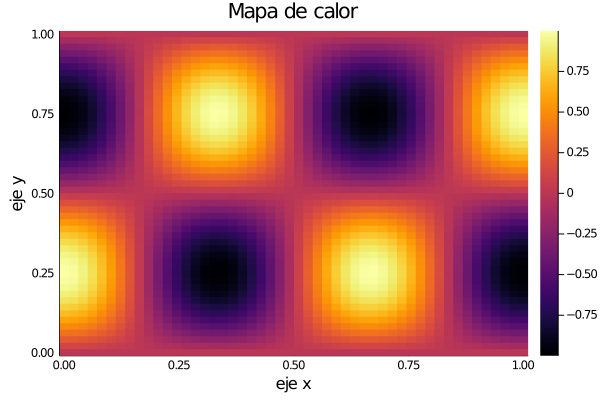

In [20]:
heatmap(xs,ys,cs)
title!("Mapa de calor")
xlabel!("eje x")
ylabel!("eje y")

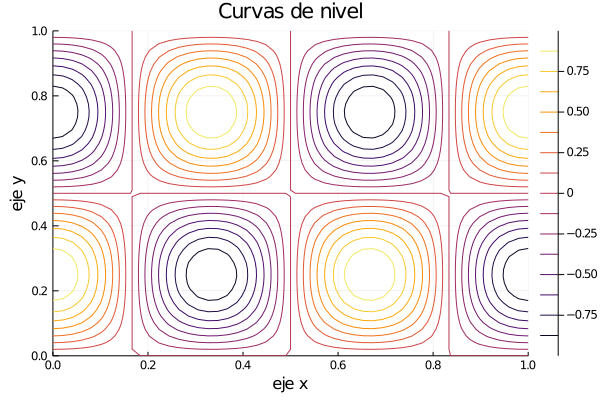

In [21]:
contour(xs,ys,cs)
title!("Curvas de nivel")
xlabel!("eje x")
ylabel!("eje y")

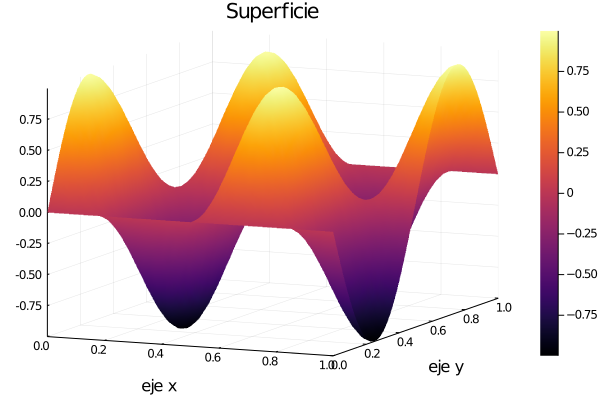

In [22]:
surface(xs,ys,cs)
title!("Superficie")
xlabel!("eje x")
ylabel!("eje y")

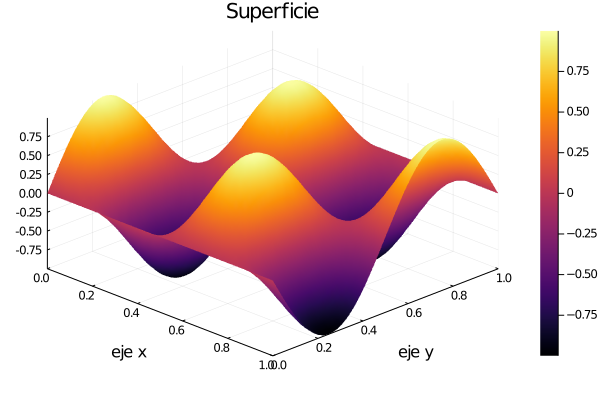

In [31]:
# camera=(phi,theta) rota la orientación de los ejes cartesianos con esos ángulos polares
surface(xs,ys,cs,camera=(45,60))
title!("Superficie")
xlabel!("eje x")
ylabel!("eje y")

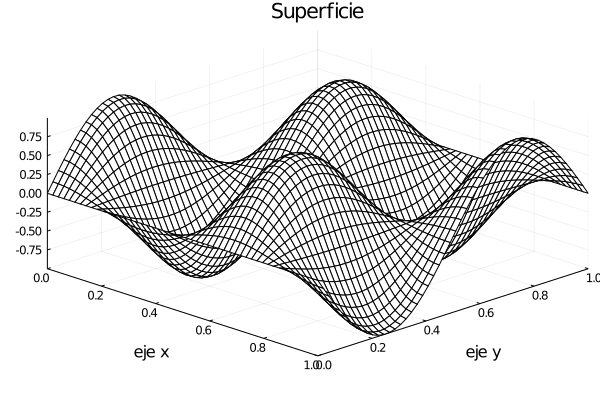

In [34]:
# superficie como un tejido
wireframe(xs,ys,cs,camera=(45,60))
title!("Superficie")
xlabel!("eje x")
ylabel!("eje y")

### Ejercicio 1

La función $\delta(\mathbf{x})$ se puede extender a dos dimensiones, y es posible aproximarla de la misma forma que antes:

$$
\delta_\epsilon(\mathbf{x}) = \begin{cases}
0 & \text{si } \Vert \mathbf{x} \Vert > \epsilon \\
1/(\pi \epsilon^2) & \text{si } \Vert \mathbf{x} \Vert \leq \epsilon \\
\end{cases}
$$

Con $\epsilon>0$ un número real pequeño y $\Vert \mathbf{x} \Vert$ la norma euclideana del vector $\mathbf{x}$

Usa la función `norm` de la librería `LinearAlgebra` para implementar una función `deltaVec(X,epsilon)` que calcule dicha función en un vector `X`. Reliza distntas graficas tando 2D (`heatmap`,`contour`) como 3D (`surface`,`wireframe`) para dicha función.

## Discretización de la ecuación

Recordando nuestra notación:

$$
u(t_k,x_i,y_j) = u^{(k)}_{i,j}
$$

Si discretizamos las derivadas parciales de la ecuación con diferencias finitas, obtenemos la siguiente expresión

$$
\frac{u^{(k+1)}_{i,j} - u^{(k)}_{i,j}}{h} = D \left( \frac{u^{(k)}_{i+1,j} + u^{(k)}_{i-1,j} - 2u^{(k)}_{i,j}}{k^2} + \frac{u^{(k)}_{i,j+1} + u^{(k)}_{i,j-1} - 2u^{(k)}_{i,j}}{k^2} \right)
$$

### Ejercicio 2

Despeja $u^{(k+1)}_{i,j}$ de la expresión anterior. 

## Avance en el tiempo

La expresión obtenida en el ejercicio 2 nos permite calcular explícitamente $u^{(k+1)}_{i,j}$ como función de $u^{(k)}$ evaluada en algunos puntos vecinos. Podemos ir calculando $u^{(1)}_{i,j}$, $u^{(2)}_{i,j}$, .. partiendo a partir de la condición inicial dada por 

$$
u^{(0)}_{i,j} = g(x_i,y_j)
$$

Sin embargo, al igual que en el caso de una dimensión, nos volvemos a enfrentar al problema de que, para evaluar los puntos en la frontera $u^{(k+1)}_{0,j}$, $u^{(k+1)}_{m,j}$, $u^{(k+1)}_{i,0}$ y $u^{(k+1)}_{i,m}$, debemos conocer los valores $u^{(k)}_{-1,j}$, $u^{(k)}_{m+1,j}$, $u^{(k)}_{i,-1}$ y $u^{(k)}_{i,m+1}$. 


Estos valores no existen pero podemos usar las condiciones de frontera para estimarlos.

### Ejercicio 3
Supongamos que tenemos el caso de condiciones de frontera **absorbentes**, descrito por las condiciones de Dirichlet:

$$
u(t,0,y) = u(t,1,y) = u(t,x,0) = u(t,x,1) = 0
$$

Expresa analíticamente qué valor deberían de tomar $u^{(k)}_{-1,j}$, $u^{(k)}_{m+1,j}$, $u^{(k)}_{i,-1}$ y $u^{(k)}_{i,m+1}$

### Ejercicio 4

Implementa una función `calor2dAbsorbentes(D,t_f,h,k,g)` que resuelva el problema de la ecuación de calor en dos dimensiones con condición inicial $u(0,x,y) = g(x,y)$ y condiciones de frontera absorbentes.

Los argumentos de tu función deben ser una constante de difusión `D`, tiempo final `t_f`, pasos de tiempo y espacial `h`,`k`, respectivamente y `g` una función **vectorial** correspondiente a la condición inicial. Tu función debe de regresar los tiempos `[0,t_1,..,t_n]`, los puntos de x `[0,x_1,...,x_{m-1},1]`, los puntos de y `[0,y_1,...,y_{m-1},1]` y un **arreglo de matrices**, de longitud de $ (n+1)$, que en la entrada $k$ tenga una matriz de $(m+1)\times (m+1)$ con los valores de $u_{i,j}^{(k)}$


**Sugerencia 1**: antes de cualquier cosa, encuentra las expresiones que deben cumplir $u^{(k)}_{-1,j}$, $u^{(k)}_{m+1,j}$, $u^{(k)}_{i,-1}$ y $u^{(k)}_{i,m+1}$ en cada tiempo.
 

### Ejercicio 5

Utiliza tu función `calor2dAbsorbentes` para resolver el problema anteriormente citado, con condición inicial 

$$g(x,y) = \delta((x,y)-(0.5,0.5))$$

Toma valores arbitrarios del los parámetros `D`, `k`, `h` que cumplan que 

$$
\frac{Dh}{k^2} < \frac{1}{2}
$$

Hagan varios mapa de calor de los primeros tiempos de la función $u^{(k)}_{i,j}$ (uno para cada tiempo) y después realiza dos animaciones de la solución, una en donde este vista como superficie y en otra como como mapa de calor, en todo el intervalo de tiempo. Juega con el valor $h$ y el número de cuadros para que tu animación se pueda ver bien.


**Sugerencia 1**: Toma un valor fijo de `epsilon` y utiliza tu función `deltaVec(X,epsilon)` para dar una función anónima que solo dependa de `X` como argumento a `calor2dAbsorbentes`. Ten cuidado con el valor de epsilon, pues si lo tomas demasiado pequeño tu condición incial será la función $0$.



### Ejercicio 6
Supongamos que ahora tenemos un problema con condiciones de frontera **reflejantes**, es decir, condiciones de Neumann que cumplen con:

$$
\frac{\partial u}{\partial x}(t,0,y) =  \frac{\partial u}{\partial x}(t,1,y) = \frac{\partial u}{\partial y}(t,x,0) =  \frac{\partial u}{\partial y}(t,x,1) = 0
$$

Utiliza una aproximación de diferencias finitas de  $\partial u / \partial x$ y para $\partial u / \partial y$ en los extremos  $u^{(k)}_{0,j}$, $u^{(k)}_{m,j}$, $u^{(k)}_{i,0}$, $u^{(k)}_{i,m}$ para encontrar una expresión analítica para $u^{(k)}_{-1,j}$, $u^{(k)}_{m+1,j}$, $u^{(k)}_{i,-1}$ y $u^{(k)}_{i,m+1}$

### Ejercicio 7

Utiliza las expresiones del ejercicio anterior para implementar `calor2dReflejantes(D,t_f,h,k,g)` una función que resuelva el problema de la ecuación de calor en dos dimensiones con condición inicial $u(0,x,y) = g(x,y)$ y condiciones de frontera reflejantes.

Los argumentos de tu función deben ser una constante de difusión `D`, tiempo final `t_f`, pasos de tiempo y espacial `h`,`k`, respectivamente y `g` una función **vectorial** correspondiente a la condición inicial. Tu función debe de regresar los tiempos `[0,t_1,..,t_n]`, los puntos de x `[0,x_1,...,x_{m-1},1]`, los puntos de y `[0,y_1,...,y_{m-1},1]` y un **arreglo de matrices**, de longitud de $ (n+1)$, que en la entrada $k$ tenga una matriz de $(m+1)\times (m+1)$ con los valores de $u_{i,j}^{(k)}$

Repite el ejercicio 5 pero para estas condiciones de frontera. Realiza animaciones de la superficie y el mapa de calor para las soluciones.

## Fuentes de calor: problema más complejo

La ecuación de calor puede modificarse para añadir un término $F(t,x,y)$ que corresponda a una fuente de calor. Con ese término, la ecuación queda de la forma:

$$
\frac{\partial u}{\partial t} = D\nabla^2 u + F(t,x,y)
$$

En ese caso, la discretización de la ecuación nos lleva a la regla:

$$
u^{(k+1)}_{i,j}  = u^{(k)}_{i,j} +  hF^{(k)}_{i,j} +  \frac{Dh}{k^2} \left( u^{(k)}_{i+1,j} + u^{(k)}_{i-1,j}  + u^{(k)}_{i,j+1} + u^{(k)}_{i,j-1} - 4u^{(k)}_{i,j} \right)
$$

Con $F^{(k)}_{i,j} = F(t_k,x_i,y_j)$



### Ejercicio 8

Usa las expresiones del ejercicio 6 para implementar una función `calor2dFuente(D,t_f,h,k,g,F)` una función que resuelva el problema de la ecuación de calor en dos dimensiones, con una fuente de calor $F(t,x,y)$, con condición inicial $u(0,x,y) = g(x,y)$ y condiciones de frontera reflejantes.

Los argumentos de tu función deben ser:

* Una constante de difusión `D`

* tiempo final `t_f`

* pasos de tiempo y espacial `h`,`k`, respectivamente

* `F` una función **vectorial** correspondiente a la fuente de calor $F$ 

* `g` una función **vectorial** correspondiente a la condición inicial. 

Tu función debe de regresar los tiempos `[0,t_1,..,t_n]`, los puntos de x `[0,x_1,...,x_{m-1},1]`, los puntos de y `[0,y_1,...,y_{m-1},1]` y un **arreglo de matrices**, de longitud de $ (n+1)$, que en la entrada $k$ tenga una matriz de $(m+1)\times (m+1)$ con los valores de $u_{i,j}^{(k)}$

**Sugerencia** para construir esta función, toma como base tu función `calor2dReflejante(D,t_f,h,k,g)` y solo hazle las (pocas) modificaciones necesarias.

### Ejercicio 9

Utiliza tu función `calor2dFuente` para resolver el problema anteriormente citado, con condición inicial 

$$g(x,y) = 0$$

Y con una fuente de calor

$$
F(t,x,y) = \begin{cases}
1+\cos{(2\pi t)} & \text{si  } \quad \Vert (x - 0.5,y-0.5) \Vert < 0.1 \\
0 & \text{en otro caso} \\
\end{cases}
$$

Realiza animaciones de la superficie y el mapa de calor para las soluciones. 

**Sugerencia 1** toma un paso espacial `k` como para que la fuente de calor no sea 0 siempre. No te olvides de la desigualdad que deben de cumplir los parámetros `D`, `h`, `k`.

**Sugerencia 2** Usa la librería `LinearAlgebra` para primero definir la función `F` de la fuente de calor
